<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/BT5_FuzzyLogic_Homework_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dc254bc782830e380a69c4d96551f0a37defd5c55f6e04d75359405a27f9c61d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


5.741569214849952


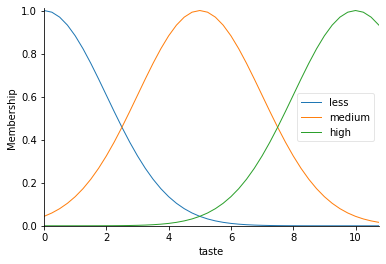

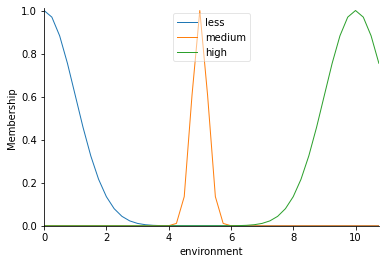

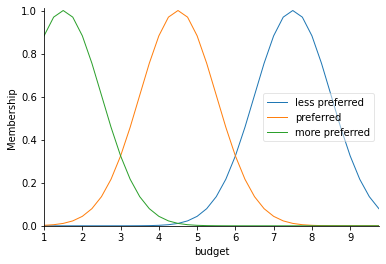

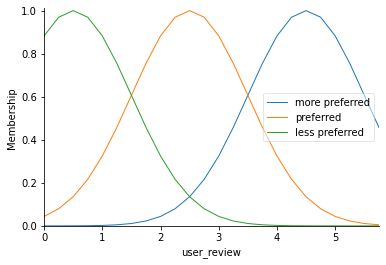

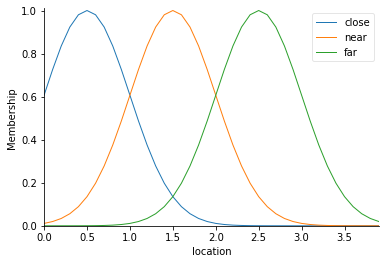

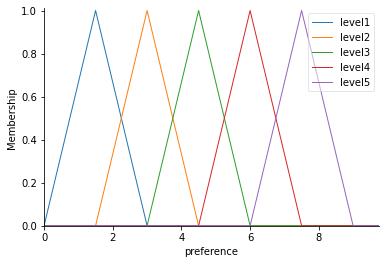

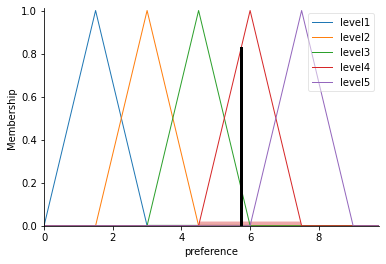

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

taste        = ctrl.Antecedent(np.arange(0,11,0.25),'taste')
environment  = ctrl.Antecedent(np.arange(0,11,0.25),'environment')
budget       = ctrl.Antecedent(np.arange(1,10,0.25),'budget')
user_review  = ctrl.Antecedent(np.arange(0,6,0.25),'user_review')
location     = ctrl.Antecedent(np.arange(0,4,0.1),'location')
preference   = ctrl.Consequent(np.arange(0,10,0.25),'preference')
# Với biến đầu ra là proteinuria chú ý sử dụng: Consequent

# Tạo hàm liên thuộc
# TASTE
taste['less']=fuzz.gaussmf(taste.universe,0,2)
taste['medium']=fuzz.gaussmf(taste.universe,5,2)
taste['high']=fuzz.gaussmf(taste.universe,10,2)

# ENVIRONMENT
environment['less']=fuzz.gaussmf(environment.universe,0,1)
environment['medium']=fuzz.gaussmf(environment.universe,5,0.25)
environment['high']=fuzz.gaussmf(environment.universe,10,1)

# BUDGET
budget['less preferred']=fuzz.gaussmf(budget.universe,7.5,1)
budget['preferred']=fuzz.gaussmf(budget.universe,4.5,1)
budget['more preferred']=fuzz.gaussmf(budget.universe,1.5,1)

# USER_REVIEW
user_review['more preferred']=fuzz.gaussmf(user_review.universe,4.5,1)
user_review['preferred']=fuzz.gaussmf(user_review.universe,2.5,1)
user_review['less preferred']=fuzz.gaussmf(user_review.universe,0.5,1)

# LOCATION
location['close']=fuzz.gaussmf(location.universe,0.5,0.5)
location['near']=fuzz.gaussmf(location.universe,1.5,0.5)
location['far']=fuzz.gaussmf(location.universe,2.5,0.5)

# PREFERENCE
preference['level1']=fuzz.trimf(preference.universe,[0,1.5,3])
preference['level2']=fuzz.trimf(preference.universe,[1.5,3,4.5])
preference['level3']=fuzz.trimf(preference.universe,[3,4.5,6])
preference['level4']=fuzz.trimf(preference.universe,[4.5,6,7.5])
preference['level5']=fuzz.trimf(preference.universe,[6,7.5,9])

taste.view()
environment.view()
budget.view()
user_review.view()
location.view()
preference.view()

rule= []

list_taste = [' ','less','medium','high']
list_environment = [' ','less','medium','high']
list_budget=[' ','less preferred','preferred','more preferred']
list_user_review = [' ','less preferred','preferred','more preferred']
list_location = [' ','far','near','close']

list_preference=['level1','level2','level3','level4','level5']

for a in range(1,4):
  for b in range (1,4):
    for c in range(1,4):
      for d in range (1,4):
        for e in range (1,4):
          i = c + b + e + a + d
          if(i <=3): k=0
          if(3< i <=6): k=1
          if(6< i <=9): k=2
          if(9< i <=12):k=3
          if(12< i <=15):k=4
          rule.append(ctrl.Rule(taste[list_taste[a]]&environment[list_environment[b]]
                                &budget[list_budget[c]]&user_review[list_user_review[d]]
                                &location[list_location[e]],preference[list_preference[k]]))

preferencing_ctrl = ctrl.ControlSystem(rule)
preferencing=ctrl.ControlSystemSimulation(preferencing_ctrl)
preferencing.input['taste']=10
preferencing.input['environment']=10
preferencing.input['budget']=10
preferencing.input['user_review']=10
preferencing.input['location']=10
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim=preferencing)



